In [141]:
import numpy as np
import matplotlib.pyplot as plt 
import random                          # crear numeros aleatoriamente
import scipy.io as sio
from sklearn.model_selection import train_test_split


In [142]:
# cargar el archivo .mat
data = sio.loadmat('Tiosulfatosodio.mat')

#Extrayendo matriz de caracteristicas 
Xi = data['x']

#Extrayendo dato esperado (Clases)
Yi = data['y']

#Agregando el bias a las filas de la matriz de caracteristicas (Entradas)
bias = np.full((Xi.shape[0], 1), 1)
Xi = np.hstack((bias, Xi))

#numero de datos
num_datos = Xi.shape[0]

#numero de caracteristicas
caract = Xi.shape[1]-1                  # Se resta el bias 




#Definicion de errores
Err_entr = 10;
Err_pru = 10;

#Datos de entrenamiento y prueba: entrenamiento 90% , prueba 10%
X_ent, X_pru, Y_ent, Y_pru = train_test_split(Xi, Yi, test_size=0.1)

#Obteniendo datos de validacion: Validacion 10% y Entrenamiento 80%
#Se extraen los datos de validación a partir de los de entrenamiento
X_ent, X_val, Y_ent, Y_val = train_test_split(X_ent, Y_ent, test_size=0.1, random_state=42)

#Obteniendo datos de entrenamiento y prueba
D_entre  =  len(X_ent)       # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
D_prueba =  len(X_pru)       #Datos de validacion 
D_val    =  len(X_val)

print(D_entre)

324


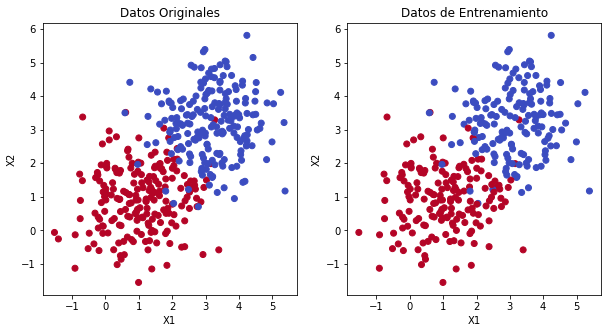

In [143]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la segunda gráfica en el segundo subplot
ax1.scatter(Xi[:, 1], Xi[:, 2], c=Yi, cmap=plt.cm.coolwarm)
ax1.set_title('Datos Originales')
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

# Graficar la primera gráfica en el primer subplot
ax2.scatter(X_ent[:, 1], X_ent[:, 2], c=Y_ent, cmap=plt.cm.coolwarm)
ax2.set_title('Datos de Entrenamiento')
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")


# Mostrar la figura
plt.show()


In [144]:
#Definicion de los pesos e inicialización 
Wk = []  
for i in range(Xi.shape[1]):                      # ciclo para agregar los numeros aleatorios con los que se inicializaran los pesos
    Wk.append(random.uniform(0,1))                # vector de pesos extendido
print(Wk)


[0.45919663776311836, 0.6137499150342667, 0.3918983485725639]


In [145]:
def Calculo_error(x,y,w,n):
    """
    X: Features vector 
    Y: Label output 
    w: Weight vector 
    n: Data length 
    """
    
    suma = 0                               # Cont. that storage the errors 
    
    for i in range (n):
        g = np.dot(np.transpose(w), x[i])  # Internal State of Neuron 

        if g < 0:                          # Umbral for classification in the LMS Algorithm
            g = -1
        else:
            g = 1

        if g != y[i]:                      # CError condition
            suma = suma + 1                # Cont. Error

    error_pct = 100.0 * suma / n           # Porcentual error
    
    return error_pct

In [146]:
e = 0
error_ent = []
u=0.1
suma=0
iteraciones = 0

Emin = 10
Eent =  0

print("Wo: ", Wk )

u = 0.1
gamma = 1.05
beta =  1.04
alpha = 0.7


V_errorEnt = []
V_errorPru = []


while( (iteraciones<1000)):

    ################## Error de entrenamiento  ###########################
    
    i = np.random.randint(0,D_entre)
    print("iteraciones =",iteraciones,"\n")
    Y = Y_ent[i][0]
    g = np.dot(np.transpose(Wk),X_ent[i]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
    print("g: ", g)
    e = (g - Y)  #Error entre la salida dada y la salida esperada 
    print("error:",e)
    
    error_ent.append(e)
    
    ########################################################################
   
    if( (error_ent[iteraciones]/error_ent[iteraciones-1])>beta):
        u = u*alpha
    elif(error_ent[iteraciones]<error_ent[iteraciones-1]):
        u = u*gamma

    print("Peso Wk: ", Wk , "\n")
    Eent  = Calculo_error(X_ent,Y_ent,Wk,D_entre)
    V_errorEnt.append(Eent) 
    print("Error de entrenamiento: ", Eent )
    Epru  = Calculo_error(X_pru,Y_pru,Wk,D_prueba)
    V_errorPru.append(Epru)
    print("Error de Prueba: ",  Epru )
    
        
    Wk = Wk - e*u*X_ent[i]    #np.dot(value,Xi[i]) #Encuentro los nuevos valores de los pesos utilziando np.dot para multiplicar const * matriz
    
    iteraciones = iteraciones + 1;


Wo:  [0.45919663776311836, 0.6137499150342667, 0.3918983485725639]
iteraciones = 0 

g:  1.2032514514186323
error: 0.20325145141863232
Peso Wk:  [0.45919663776311836, 0.6137499150342667, 0.3918983485725639] 

Error de entrenamiento:  49.69135802469136
Error de Prueba:  57.5
iteraciones = 1 

g:  3.0544970936216567
error: 4.054497093621657
Peso Wk:  [0.43887149 0.59564021 0.38167071] 

Error de entrenamiento:  49.69135802469136
Error de Prueba:  57.5
iteraciones = 2 

g:  -0.8034262832841405
error: -1.8034262832841406
Peso Wk:  [ 0.1550567  -0.15715172 -0.38852227] 

Error de entrenamiento:  41.358024691358025
Error de Prueba:  32.5
iteraciones = 3 

g:  -0.12634551235426203
error: 0.8736544876457379
Peso Wk:  [ 0.28760853 -0.06383579 -0.09926236] 

Error de entrenamiento:  8.333333333333334
Error de Prueba:  10.0
iteraciones = 4 

g:  0.15433246397379768
error: -0.8456675360262023
Peso Wk:  [ 0.22339492 -0.18789714 -0.28726844] 

Error de entrenamiento:  40.74074074074074
Error de Prue

Error de entrenamiento:  4.938271604938271
Error de Prueba:  2.5
iteraciones = 67 

g:  0.8581457361410479
error: -0.14185426385895206
Peso Wk:  [ 0.7902813  -0.1920535  -0.20516209] 

Error de entrenamiento:  4.62962962962963
Error de Prueba:  2.5
iteraciones = 68 

g:  0.5014312511282323
error: -0.4985687488717677
Peso Wk:  [ 0.79118592 -0.19164851 -0.20584043] 

Error de entrenamiento:  4.62962962962963
Error de Prueba:  2.5
iteraciones = 69 

g:  0.013388550700279889
error: -0.9866114492997201
Peso Wk:  [ 0.79341151 -0.18735321 -0.2067067 ] 

Error de entrenamiento:  4.320987654320987
Error de Prueba:  2.5
iteraciones = 70 

g:  0.3076466705108358
error: -0.6923533294891642
Peso Wk:  [ 0.79649444 -0.18161631 -0.20027281] 

Error de entrenamiento:  4.012345679012346
Error de Prueba:  0.0
iteraciones = 71 

g:  -0.40701192228551275
error: 0.5929880777144872
Peso Wk:  [ 0.79865788 -0.17647574 -0.19965374] 

Error de entrenamiento:  4.012345679012346
Error de Prueba:  0.0
iteraciones =

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 119 

g:  0.3129979225156063
error: -0.6870020774843937
Peso Wk:  [ 0.80534643 -0.2006847  -0.22101458] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 120 

g:  0.2511842363597341
error: -0.7488157636402659
Peso Wk:  [ 0.80575164 -0.20013105 -0.22061462] 

Error de entrenamiento:  6.481481481481482
Error de Prueba:  5.0
iteraciones = 121 

g:  -0.6071352047913572
error: 0.3928647952086428
Peso Wk:  [ 0.80606081 -0.19971214 -0.22021746] 

Error de entrenamiento:  6.481481481481482
Error de Prueba:  5.0
iteraciones = 122 

g:  0.31435370434987475
error: -0.6856462956501252
Peso Wk:  [ 0.8058986  -0.20031608 -0.22071067] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 123 

g:  0.43424731877647904
error: -0.565752681223521
Peso Wk:  [ 0.80619584 -0.19990996 -0.22041728] 

Error de entrenamiento:  6.481481481481482
Error de Prueba:  5.0
iteracion

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 167 

g:  -0.4906431895180515
error: 0.5093568104819485
Peso Wk:  [ 0.80596371 -0.20196828 -0.22379542] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 168 

g:  -0.4637890891395063
error: 0.5362109108604938
Peso Wk:  [ 0.80595704 -0.20198046 -0.22382308] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 169 

g:  0.9226481835333279
error: -0.07735181646667211
Peso Wk:  [ 0.80595213 -0.20199257 -0.22384004] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 170 

g:  -1.093002038024275
error: -0.09300203802427509
Peso Wk:  [ 0.80595287 -0.20199294 -0.2238401 ] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 171 

g:  0.3518384754139497
error: -0.6481615245860504
Peso Wk:  [ 0.8059535  -0.2019901  -0.22383734] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteracio

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 227 

g:  -0.6793939417820708
error: 0.3206060582179292
Peso Wk:  [ 0.80596702 -0.20198659 -0.22383371] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 228 

g:  -0.8315360939189669
error: 0.16846390608103312
Peso Wk:  [ 0.80596699 -0.20198672 -0.22383383] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 229 

g:  0.3810137135514419
error: -0.618986286448558
Peso Wk:  [ 0.80596697 -0.20198679 -0.22383391] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 230 

g:  0.607302372026715
error: -0.392697627973285
Peso Wk:  [ 0.80596705 -0.20198678 -0.22383377] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 231 

g:  0.24813902428932755
error: -0.7518609757106725
Peso Wk:  [ 0.80596709 -0.20198672 -0.22383379] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 272 

g:  0.21536391719836795
error: -0.7846360828016321
Peso Wk:  [ 0.80596733 -0.20198686 -0.2238337 ] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 273 

g:  0.2858451384320295
error: -0.7141548615679705
Peso Wk:  [ 0.80596734 -0.20198685 -0.2238337 ] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 274 

g:  0.4200767738905368
error: -0.5799232261094631
Peso Wk:  [ 0.80596734 -0.20198685 -0.2238337 ] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 275 

g:  0.36663617355956585
error: -0.6333638264404342
Peso Wk:  [ 0.80596734 -0.20198684 -0.2238337 ] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 276 

g:  0.6831968716914052
error: -0.3168031283085948
Peso Wk:  [ 0.80596734 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteracio

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 334 

g:  -0.4096553214376978
error: 0.5903446785623022
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 335 

g:  -0.2082177914297101
error: 0.7917822085702899
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 336 

g:  0.38101449311217434
error: -0.6189855068878256
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 337 

g:  0.42888286716146806
error: -0.5711171328385319
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 338 

g:  -0.864401785105666
error: 0.135598214894334
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteracione

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 390 

g:  -0.013007400631659838
error: -1.0130074006316598
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 391 

g:  -0.7210321955998831
error: 0.2789678044001169
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 392 

g:  -0.6853161575582661
error: 0.31468384244173386
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 393 

g:  0.42007679292293887
error: -0.5799232070770611
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 394 

g:  -0.20821779231199683
error: 0.7917822076880032
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iter

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 465 

g:  0.4190510111692959
error: -0.5809489888307041
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 466 

g:  0.547170658457659
error: -0.452829341542341
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 467 

g:  0.7666619083984677
error: -0.2333380916015323
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 468 

g:  -0.7734074972304456
error: 0.22659250276955445
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 469 

g:  -0.4418287689424927
error: 0.5581712310575073
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones

Error de Prueba:  5.0
iteraciones = 541 

g:  -0.9917995960589038
error: 0.008200403941096224
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 542 

g:  -0.37053374459701804
error: 0.629466255402982
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 543 

g:  -0.622562091694497
error: 0.37743790830550294
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 544 

g:  -0.46383111671794136
error: 0.5361688832820586
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 545 

g:  0.2160913492752916
error: -0.7839086507247084
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 546 

g:  0.15207602296552253
error:

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 599 

g:  0.05345391670493782
error: -0.9465460832950622
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 600 

g:  -0.7071635988578775
error: 0.2928364011421225
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 601 

g:  0.569195151688527
error: -0.43080484831147303
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 602 

g:  0.9520782664301078
error: -0.047921733569892155
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 603 

g:  -0.37826990755472806
error: 0.621730092445272
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraci

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 647 

g:  -0.01300740066706041
error: -1.0130074006670604
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 648 

g:  -0.9246280764911473
error: 0.07537192350885269
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 649 

g:  -0.4096553234030609
error: 0.5903446765969391
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 650 

g:  -0.7083929551109659
error: 0.2916070448890341
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 651 

g:  0.7540027784938655
error: -0.24599722150613446
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iterac

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 723 

g:  -0.15018624007157944
error: 0.8498137599284206
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 724 

g:  -0.8231033761851767
error: 0.1768966238148233
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 725 

g:  -0.21178205748431012
error: 0.7882179425156899
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 726 

g:  -0.40972591210644815
error: 0.5902740878935518
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 727 

g:  1.0323244254268338
error: 0.03232442542683378
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraci

Error de Prueba:  5.0
iteraciones = 824 

g:  -0.8682377507934684
error: 0.13176224920653157
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 825 

g:  -0.037029776805728554
error: -1.0370297768057286
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 826 

g:  0.5135348463975884
error: -0.4864651536024116
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 827 

g:  0.9657021460845839
error: -0.034297853915416066
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 828 

g:  -1.0023666724401246
error: -0.002366672440124562
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 829 

g:  -0.08406675555433063

Error de Prueba:  5.0
iteraciones = 880 

g:  -0.4207384279243684
error: 0.5792615720756316
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 881 

g:  -0.1577303552255886
error: 0.8422696447744114
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 882 

g:  -0.9221525240445267
error: 0.07784747595547326
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 883 

g:  0.27524851871639455
error: -0.7247514812836054
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 884 

g:  -0.22946311726371443
error: -1.2294631172637145
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 885 

g:  0.6854804349108347
error:

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 946 

g:  0.4686677924270852
error: -0.5313322075729148
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 947 

g:  -0.5647605600545407
error: 0.4352394399454593
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 948 

g:  -0.666152565337717
error: 0.33384743466228295
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 949 

g:  -0.8904941452946052
error: 0.10950585470539476
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteraciones = 950 

g:  -0.5140007812523264
error: 0.4859992187476736
Peso Wk:  [ 0.80596735 -0.20198684 -0.22383369] 

Error de entrenamiento:  6.790123456790123
Error de Prueba:  5.0
iteracion

In [147]:
##################  Probando datos de Validacion  ###########
error_val = Calculo_error(X_val,Y_val,Wk,D_val)
print("Error de entrenamiento: ", np.round(Eent,4))
print("Error de Prueba: ",  np.round(Epru,4) )
print("Error total de validacion: ", np.round(error_val,4))

Error de entrenamiento:  6.7901
Error de Prueba:  5.0
Error total de validacion:  11.1111


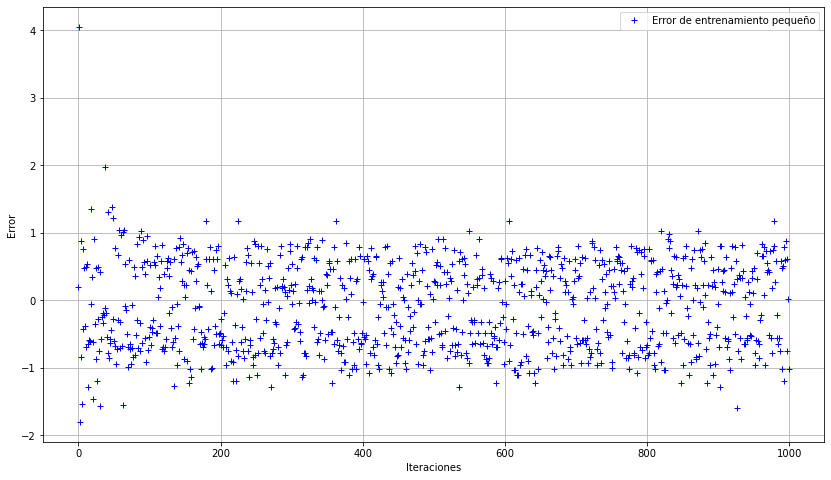

In [148]:
plt.figure(figsize=(14,8))
plt.plot(error_ent, 'b+', label = "Error de entrenamiento pequeño")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.grid()

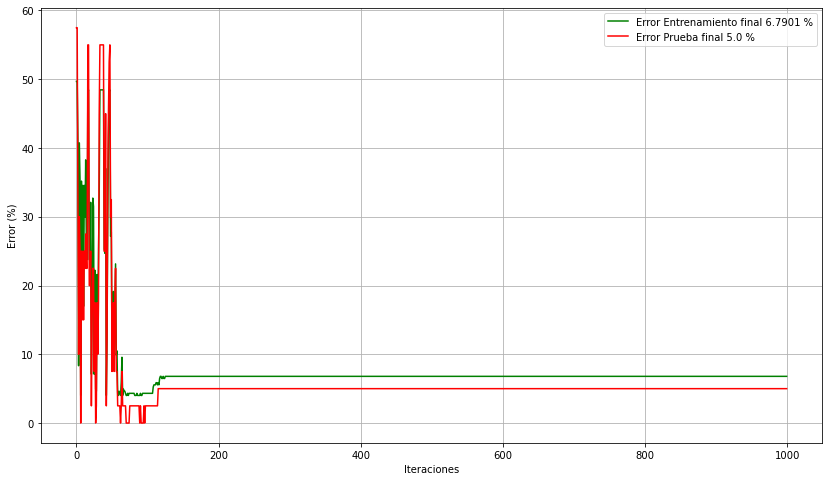

In [149]:
plt.figure(figsize=(14,8))
plt.plot(V_errorEnt , 'g' ,label = f"Error Entrenamiento final {round(Eent,4)} %")
plt.plot(V_errorPru, 'r' , label = f"Error Prueba final {round(Epru,4)} %")
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Error (%)')
plt.grid()